__Задание__		
* показать понедельную динамику посещаемости сайта за сентябрь-ноябрь 2016. Показатели: визиты, просмотры, среднедневное кол-во визитов на посетителя			
* рассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)	
* построить помесячный прогноз трафика проекта на 2017 год (по визитам)			
* визуализировать полученные данные			

## Обзор и обработка данных

### Загрузка и обзор данных

In [1]:
# загрузим библиотеки
import xlwings as xw
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# загрузим файл, вторую страницу
df = pd.read_excel('Аналитик_РБК_тестовое задание.xlsx','Исходные данные')

In [3]:
df.head()

,Интервал дат визита,Визиты,Посетители,Просмотры
0,2015-01-01,73800,66742,141136
1,2015-01-02,94070,85086,179118
2,2015-01-03,95847,86782,184094
3,2015-01-04,83911,75901,160691
4,2015-01-05,105634,94929,206353


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Интервал дат визита  731 non-null    object
 1   Визиты               731 non-null    int64 
 2   Посетители           731 non-null    int64 
 3   Просмотры            731 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 23.0+ KB


In [5]:
# проверим наличие дубликатов
df.duplicated().sum()

0

In [6]:
# проверим наличие пропусков
df.isna().sum()

Интервал дат визита    0
Визиты                 0
Посетители             0
Просмотры              0
dtype: int64

__Вывод__

* В файле отсутствуют дубликаты и пропуски
* У столбца "Интервал дат визита" тип данных не подходящий
* Названия столбцов не в змеином регистре

### Обработка данных

__Основываясь на выводах привидем данные в порядок__

In [7]:
# изменим тип данных в столбце 'Интервал дат визита'
df['Интервал дат визита'] = pd.to_datetime(
    df['Интервал дат визита'],format = '%Y-%m-%d'
)

# изменим название столбца 'Интервал дат визита'
df = df.rename(columns={'Интервал дат визита': 'Интервал_дат_визита'})

# приведем все названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()


__Добавим дополнительные столбцы__

In [8]:
# добавим столбец номер недели
df['номер_недели'] = df['интервал_дат_визита'].dt.isocalendar().week

# добавим столбец 'год'
df['год'] = df['интервал_дат_визита'].dt.year

# добавим столбец 'месяц'
df['месяц'] = df['интервал_дат_визита'].dt.month

## Показать понедельную динамику посещаемости сайта 

* показать понедельную динамику посещаемости сайта за сентябрь-ноябрь 2016. Показатели: визиты, просмотры, среднедневное кол-во визитов на посетителя

### Создание таблицы по критериям и расчет показателей

In [9]:
# создадим таблицу по заданным критериям
# воспользуемся методом groupby

weekly_grouped_2016_autumn = df[
    (df['год'] == 2016)&((df['месяц'] == 9)
    |(df['месяц'] == 10)|(df['месяц'] == 11))
].groupby(['год','номер_недели']).agg(
    {
        'визиты':'sum',
        'посетители':'sum',
        'просмотры':'sum'
    }
).reset_index()

In [10]:
# расчитаем показатель среднедневное кол-во визитов на посетителя

weekly_grouped_2016_autumn.columns = [
    'год','номер_недели','кол-во_визитов',
    'кол-во_посетителей','кол-во_просмотров'
]
weekly_grouped_2016_autumn['среднедневное_визит-посетитель'] = (
    weekly_grouped_2016_autumn['кол-во_визитов']/
    weekly_grouped_2016_autumn['кол-во_посетителей']
)
weekly_grouped_2016_autumn.head()

,год,номер_недели,кол-во_визитов,кол-во_посетителей,кол-во_просмотров,среднедневное_визит-посетитель
0,2016,35,501255,440508,760813,1.137902
1,2016,36,702995,628002,1094608,1.119415
2,2016,37,550150,492660,915271,1.116693
3,2016,38,551580,495837,915621,1.112422
4,2016,39,745469,663834,1259742,1.122975


In [11]:
weekly_grouped_2016_autumn.describe()

,год,номер_недели,кол-во_визитов,кол-во_посетителей,кол-во_просмотров,среднедневное_визит-посетитель
count,14.0,14.0000,1.400000e+01,1.400000e+01,1.400000e+01,14.000000
mean,2016.0,41.5000,6.995771e+05,6.333176e+05,1.133457e+06,1.106759
std,0.0,4.1833,2.055831e+05,1.906824e+05,2.717552e+05,0.013658
min,2016.0,35.0000,2.896480e+05,2.616520e+05,7.236660e+05,1.092175
25%,2016.0,38.2500,5.674338e+05,5.108775e+05,9.364000e+05,1.094853
50%,2016.0,41.5000,7.167905e+05,6.538235e+05,1.164284e+06,1.103648
75%,2016.0,44.7500,7.480408e+05,6.810825e+05,1.217475e+06,1.115625
max,2016.0,48.0000,1.113021e+06,1.017786e+06,1.667133e+06,1.137902


### Визуализация данных

In [12]:
df_plot = weekly_grouped_2016_autumn
for column in ['кол-во_визитов',
               'кол-во_посетителей',
               'кол-во_просмотров']:
    df_plot[column] = (df_plot[column]/1000).round(2)
    


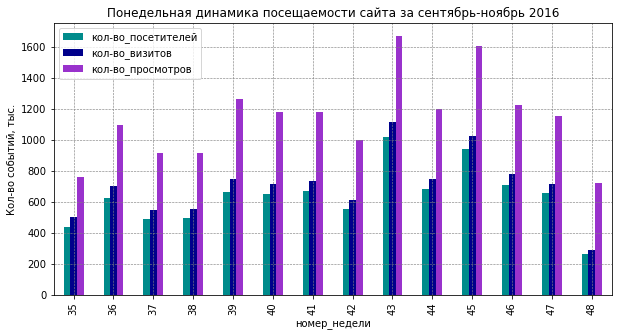

In [13]:
graph_1 = df_plot.plot(
        x = 'номер_недели', y = 
    ['кол-во_посетителей','кол-во_визитов','кол-во_просмотров'],
    title = 'Понедельная динамика посещаемости сайта за сентябрь-ноябрь 2016',
    color=["darkcyan",'darkblue','darkorchid'],figsize = (10,5),kind = 'bar',
    ylabel = 'Кол-во событий, тыс.'
    ).get_figure()

plt.grid(color = 'grey', 
        linewidth = 0.6,
        linestyle = '--')
plt.show()

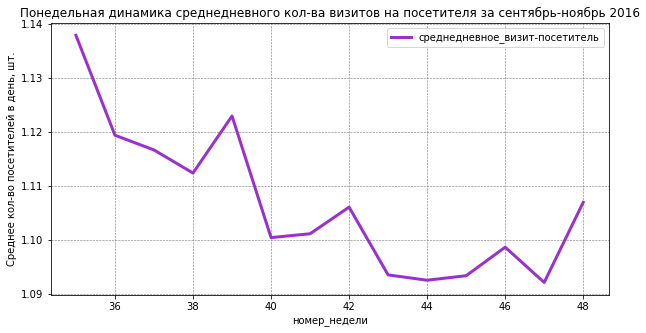

In [14]:
graph_2 = df_plot.plot(
        x = 'номер_недели', y = 
    ['среднедневное_визит-посетитель'],
    color='darkorchid',figsize = (10,5),linewidth = 3,
    title = 'Понедельная динамика среднедневного кол-ва визитов на посетителя \
за сентябрь-ноябрь 2016',
    ylabel = 'Среднее кол-во посетителей в день, шт.'
    ).get_figure()
plt.grid(color = 'grey',    
        linewidth = 0.6,    
        linestyle = '--') 
plt.show()

### Эксопрт данных


In [15]:
#weekly_grouped_2016_autumn.to_excel(
#    'РБК задание.xlsx','Sheet1',index = False
#)

wb = xw.Book('РБК задание.xlsx')
sht = wb.sheets[0]

sht["A1"].options(
    pd.DataFrame, header=1, index=False, expand='table'
).value = weekly_grouped_2016_autumn

sht.name = "Динамика осень 2016"

sht.pictures.add(
    graph_1,
    name="График № 1",
    update=True,
    left=sht.range("H2").left,
    top=sht.range("H2").top,
    height=300,
    width=600,
)


sht.pictures.add(
    graph_2,
    name="График № 2",
    update=True,
    left=sht.range("H23").left,
    top=sht.range("H23").top,
    height=300,
    width=600,
)

<Picture 'График № 2' in <Sheet [РБК задание.xlsx]Динамика осень 2016>>

## Расчет тренда (неделя к неделе, год к году)

* рассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)

### Расчет показателей

In [16]:
# напишем функцию для сводной таблицу по годам
# используем метод pivot

def pivot_df(year):
    pivot = df.query(f'год == {year}').pivot_table(
        index = ['год','номер_недели'],
        values = ['визиты','посетители','просмотры'],
        aggfunc={
            'визиты':'sum',
            'посетители':'sum',
            'просмотры':'sum'
        }
    ).reset_index()
    pivot.columns = [
        'год','номер_недели','кол-во_визитов'
        ,'кол-во_посетителей','кол-во_просмотров'
    ]
    return pivot
weekly_grouped_2015 = pivot_df(2015)
weekly_grouped_2016 = pivot_df(2016)

In [17]:
weekly_grouped_2016.head()

,год,номер_недели,кол-во_визитов,кол-во_посетителей,кол-во_просмотров
0,2016,1,907657,790877,1565890
1,2016,2,1201621,1050619,1998638
2,2016,3,922245,848395,1457332
3,2016,4,882372,786167,1491656
4,2016,5,830731,736133,1413998


In [18]:
weekly_grouped_2015.head()

,год,номер_недели,кол-во_визитов,кол-во_посетителей,кол-во_просмотров
0,2015,1,347628,314511,665039
1,2015,2,783763,704403,1571735
2,2015,3,1030030,919881,1967587
3,2015,4,997147,892820,1896072
4,2015,5,1095311,981711,2025337


In [19]:
# объеденим обе таблицы для расчета трендов

trend_table = weekly_grouped_2016.merge(weekly_grouped_2015, on = 'номер_недели', how = 'left')

trend_table['кол-во_визитов_год_к_году_%'] = ((
    (trend_table['кол-во_визитов_x']-trend_table['кол-во_визитов_y'])/
    trend_table['кол-во_визитов_y']
)*100).apply(round)

trend_table['кол-во_посетителей_год_к_году_%'] = ((
    (trend_table['кол-во_посетителей_x']-trend_table['кол-во_посетителей_y'])/
    trend_table['кол-во_посетителей_y']
)*100).apply(round)

trend_table['кол-во_просмотров_год_к_году_%'] = ((
    (trend_table['кол-во_просмотров_x']-trend_table['кол-во_просмотров_y'])/
    trend_table['кол-во_просмотров_y']
)*100).apply(round)



list_a = [
    'кол-во_визитов_неделя_к_неделе_%',
    'кол-во_посетителей_неделя_к_неделе_%',
    'кол-во_просмотров_неделя_к_неделе_%'
]

list_b = [
    'кол-во_визитов_x',
    'кол-во_посетителей_x',
    'кол-во_просмотров_x'
]


for i,j in zip(list_a,list_b):
    trend_table[i] = (trend_table[j].pct_change()*100).apply(np.rint)



In [20]:
# отберем необходимые столбцы для 
# демонстрации результатов

trend =  trend_table[
    ['год_x','номер_недели','кол-во_визитов_год_к_году_%',
    'кол-во_посетителей_год_к_году_%','кол-во_просмотров_год_к_году_%',
    'кол-во_визитов_неделя_к_неделе_%','кол-во_посетителей_неделя_к_неделе_%',
    'кол-во_просмотров_неделя_к_неделе_%']
]

In [21]:
trend.head(3)

,год_x,номер_недели,кол-во_визитов_год_к_году_%,кол-во_посетителей_год_к_году_%,кол-во_просмотров_год_к_году_%,кол-во_визитов_неделя_к_неделе_%,кол-во_посетителей_неделя_к_неделе_%,кол-во_просмотров_неделя_к_неделе_%
0,2016,1,161,151,135,NaN,NaN,NaN
1,2016,2,53,49,27,32.0,33.0,28.0
2,2016,3,-10,-8,-26,-23.0,-19.0,-27.0


### Визуализация данных

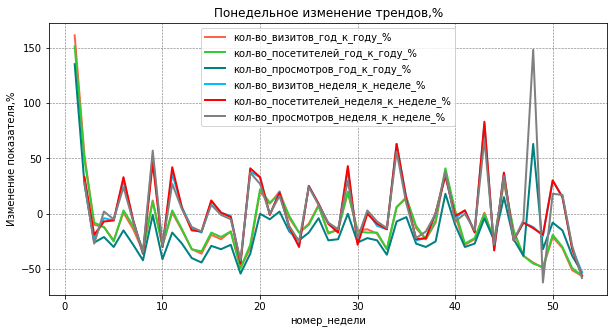

In [22]:
graph_3 = trend.plot(
        x = 'номер_недели', y = [
            'кол-во_визитов_год_к_году_%',
            'кол-во_посетителей_год_к_году_%',
            'кол-во_просмотров_год_к_году_%',
            'кол-во_визитов_неделя_к_неделе_%',
            'кол-во_посетителей_неделя_к_неделе_%',
            'кол-во_просмотров_неделя_к_неделе_%'
        ],
    color=[
        "tomato",'limegreen','teal',
        'deepskyblue', 'red','gray'
    ],title = 'Понедельное изменение трендов,%',figsize = (10,5),linewidth = 2,
    ylabel = 'Изменение показателя,%',
    ).get_figure()

plt.grid(color = 'grey',    
        linewidth = 0.6,    
        linestyle = '--') 

plt.show()




### Эксопрт данных



In [23]:
#trend.to_excel(
#    'РБК задание.xlsx','Sheet2',index = False
#)

wb = xw.Book('РБК задание.xlsx')
sht1 = wb.sheets[1]
sht1.name = "Динамика трендов"

sht1["A1"].options(
    pd.DataFrame, header=1, index=False, expand='table'
).value = trend


sht1.pictures.add(
    graph_3,
    name="График № 3",
    update=True,
    left=sht1.range("M2").left,
    top=sht1.range("M2").top,
    height=300,
    width=600,
)


<Picture 'График № 3' in <Sheet [РБК задание.xlsx]Динамика трендов>>

## Расчет прогноза

### Расчет показателя

Расчет прогноза в данном случае возможен исходя из двух показателей : изменение кол-ва визитов неделя к неделе либо год к году.

Горизонт планирования достаточно большой, релевантнее всего строить прогноз на основе изменения трендов год к году. Таким образом мы сможем не исключить возможные сезонные изменения и другие факторы.

In [24]:
forecast_2017 = pd.DataFrame()

In [25]:
forecast_2017 = trend_table[
    [
        'номер_недели','кол-во_визитов_x',
        'кол-во_визитов_год_к_году_%'
    ]
]

In [26]:
forecast_2017['прогноз_2017'] = (
    forecast_2017['кол-во_визитов_x']+
    forecast_2017['кол-во_визитов_x']*
    (forecast_2017['кол-во_визитов_год_к_году_%']/100)
)

C:\Users\damos\AppData\Local\Temp\ipykernel_12764\3186626221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_2017['прогноз_2017'] = (


In [27]:
forecast_2017 = forecast_2017.rename(columns = {
    'кол-во_визитов_x':'кол-во_визитов_2016'
})
forecast_2017.head(3)

,номер_недели,кол-во_визитов_2016,кол-во_визитов_год_к_году_%,прогноз_2017
0,1,907657,161,2368984.77
1,2,1201621,53,1838480.13
2,3,922245,-10,830020.50


### Визуализация данных

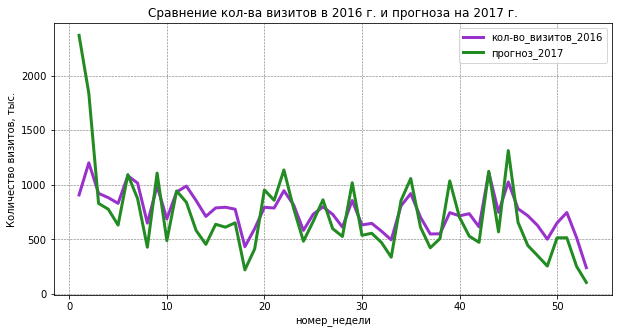

In [28]:
df = forecast_2017
df['кол-во_визитов_2016'] = df['кол-во_визитов_2016']/1000
df['прогноз_2017'] = df['прогноз_2017']/1000
graph_4 = df.plot(
    x = 'номер_недели', y = [
        'кол-во_визитов_2016','прогноз_2017'
    ],color=['darkorchid','forestgreen'],figsize = (10,5),
    title = 'Сравнение кол-ва визитов в 2016 г. и прогноза на 2017 г.',
    linewidth = 3,
    ylabel = 'Количество визитов, тыс.'
).get_figure()

plt.grid(color = 'grey',    
        linewidth = 0.6,   
        linestyle = '--') 

plt.show()

### Экспорт данных

In [29]:
wb = xw.Book('РБК задание.xlsx')
sht2 = wb.sheets[2]
sht2.name = "Прогноз 2017"

sht2["A1"].options(
    pd.DataFrame, header=1, index=False, expand='table'
).value = forecast_2017


sht2.pictures.add(
    graph_4,
    name="График № 3",
    update=True,
    left=sht2.range("F2").left,
    top=sht2.range("F2").top,
    height=300,
    width=600,
)

<Picture 'График № 3' in <Sheet [РБК задание.xlsx]Прогноз 2017>>